In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [3]:
# Lista de ítems de búsqueda
items_busqueda = ["google home", "apple tv", "amazon echo"]

item_details_list = []

for item in items_busqueda:
    # Realizar la solicitud GET para obtener la lista de ítems del término de búsqueda
    response = requests.get(f"https://api.mercadolibre.com/sites/MLA/search?q={termino}&limit=50")
    search_results = response.json()
    
    item_ids = [result['id'] for result in search_results['results']]
    
    for item_id in item_ids:
        item_url = f"https://api.mercadolibre.com/items/{item_id}"
        response = requests.get(item_url)
        
        
        if response.status_code == 200:
            item_details = response.json()
            item_details_list.append(item_details)
        else:
            print(f"No se pudo obtener información para el ítem con ID {item_id}. Código de respuesta: {response.status_code}")

print("Detalles del primer ítem:")
print(item_details_list[0])

Detalles del primer ítem:
{'id': 'MLA1381240469', 'site_id': 'MLA', 'title': 'Amazon Echo Dot 5th Gen Con Asistente Virtual Alexa Negro 110v/240v', 'seller_id': 582488493, 'category_id': 'MLA409415', 'official_store_id': None, 'price': 87721, 'base_price': 87721, 'original_price': None, 'currency_id': 'ARS', 'initial_quantity': 74, 'sale_terms': [{'id': 'WARRANTY_TYPE', 'name': 'Tipo de garantía', 'value_id': '2230280', 'value_name': 'Garantía del vendedor', 'value_struct': None, 'values': [{'id': '2230280', 'name': 'Garantía del vendedor', 'struct': None}], 'value_type': 'list'}, {'id': 'INVOICE', 'name': 'Facturación', 'value_id': '6891885', 'value_name': 'Factura A', 'value_struct': None, 'values': [{'id': '6891885', 'name': 'Factura A', 'struct': None}], 'value_type': 'list'}, {'id': 'WARRANTY_TIME', 'name': 'Tiempo de garantía', 'value_id': None, 'value_name': '6 meses', 'value_struct': {'number': 6, 'unit': 'meses'}, 'values': [{'id': None, 'name': '6 meses', 'struct': {'number':

In [5]:
import requests
import csv

items_busqueda = ["google home", "apple tv", "amazon echo"]

item_details_list = []

for item in items_busqueda:
    # Realizar la solicitud GET para obtener la lista de ítems del término de búsqueda
    response = requests.get(f"https://api.mercadolibre.com/sites/MLA/search?q={item}&limit=50")
    search_results = response.json()
    
    item_ids = [result['id'] for result in search_results['results']]
    
    for item_id in item_ids:
        item_url = f"https://api.mercadolibre.com/items/{item_id}"
        response = requests.get(item_url)
        
        if response.status_code == 200:
            item_details = response.json()
            item_details_list.append(item_details)
        else:
            print(f"No se pudo obtener información para el ítem con ID {item_id}. Código de respuesta: {response.status_code}")

variables_interes = ['id', 'title', 'price', 'condition', 'shipping', 'seller', 'category_id']

csv_file_path = "resultados_productos.csv"

with open(csv_file_path, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=variables_interes)
    
    writer.writeheader()
    
    for item_details in item_details_list:
        item_data = {var: item_details.get(var, None) for var in variables_interes}
        writer.writerow(item_data)

print(f"Los resultados se han escrito en {csv_file_path}.")

Los resultados se han escrito en resultados_productos.csv.


In [6]:
ruta_del_archivo = 'C:\\Users\\Abril\\resultados_productos.csv'
df = pd.read_csv(ruta_del_archivo)

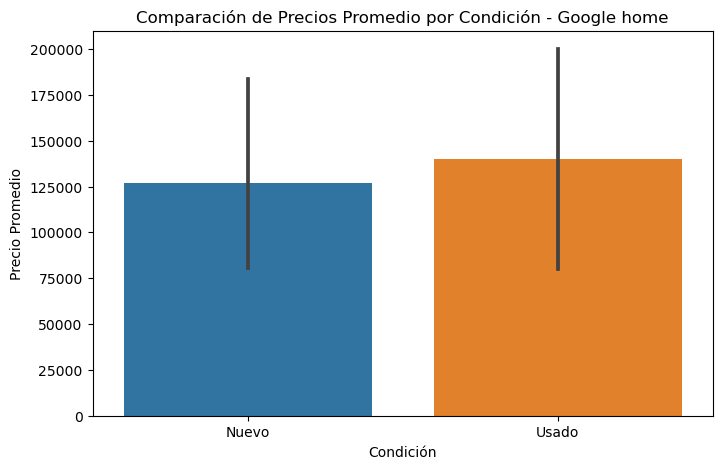

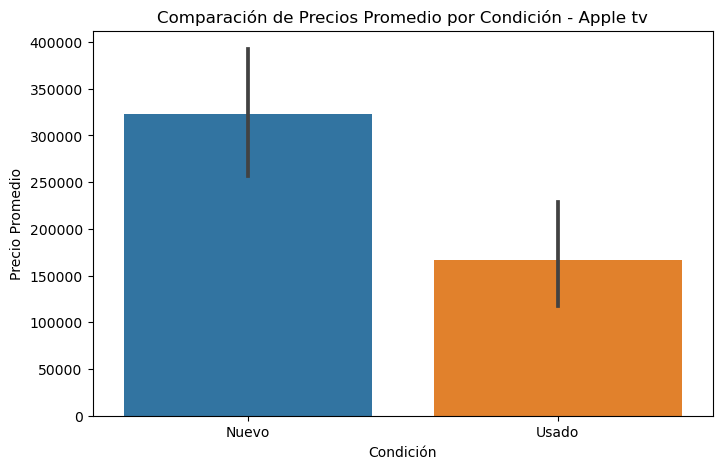

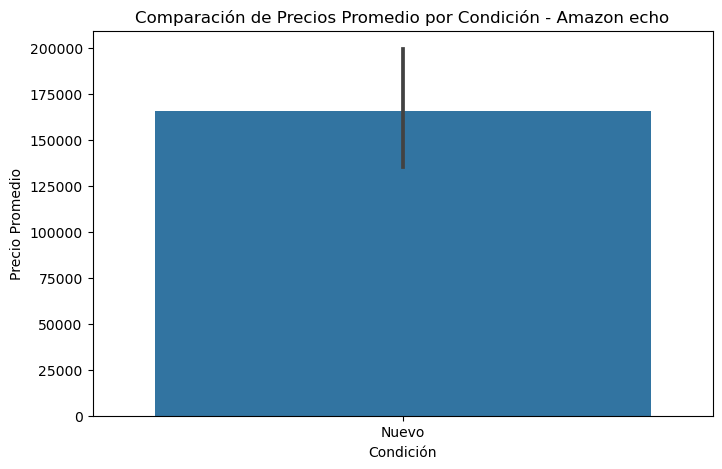

In [7]:
df = pd.DataFrame(item_details_list)

variables_interes = ['title', 'price', 'condition']
df = df[variables_interes]

df['condition'] = df['condition'].map({'new': 'Nuevo', 'used': 'Usado', 'not_specified': 'No especificado'})

for item in items_busqueda:
    plt.figure(figsize=(8, 5))
    
    df_item = df[df['title'].str.lower().str.contains(item)]
    
    sns.barplot(x='condition', y='price', data=df_item)
    
    plt.title(f'Comparación de Precios Promedio por Condición - {item.capitalize()}')
    plt.xlabel('Condición')
    plt.ylabel('Precio Promedio')
    plt.show()


In [10]:
df = pd.DataFrame(item_details_list)

variables_interes = ['title', 'price', 'condition']
df = df[variables_interes]

df['condition'] = df['condition'].map({'new': 'Nuevo', 'used': 'Usado', 'not_specified': 'No especificado'})


for item in items_busqueda:
    df_item = df[df['title'].str.lower().str.contains(item)]
    
    # Calcular el promedio de precios por condición
    promedio_precio_por_condicion = df_item.groupby('condition')['price'].mean()
    
    print(f"Promedio de precios por condición para '{item}':\n{promedio_precio_por_condicion}\n")

Promedio de precios por condición para 'google home':
condition
Nuevo    127036.486486
Usado    139995.000000
Name: price, dtype: float64

Promedio de precios por condición para 'apple tv':
condition
Nuevo    322771.844167
Usado    166697.076154
Name: price, dtype: float64

Promedio de precios por condición para 'amazon echo':
condition
Nuevo    165746.972667
Name: price, dtype: float64



In [ ]:
"""
Pasos Necesarios
1.	Realizar Solicitud GET para Obtener Ítems de la Búsqueda:
•	Utilizar la biblioteca requests de Python para realizar una solicitud GET al servicio público de MercadoLibre para obtener la lista de ítems de la búsqueda.
•	Analizar y procesar la respuesta JSON para obtener los IDs de los ítems relevantes.
2.	Realizar Solicitud GET para Obtener Detalles de cada Ítem:
•	Iterar sobre la lista de IDs de ítems obtenidos en el paso anterior.
•	Realizar solicitudes GET individuales a la API pública de MercadoLibre para obtener detalles específicos de cada ítem.
•	Procesar la respuesta JSON para extraer la información relevante del ítem.
3.	Desnormalización de JSON y Escritura en CSV:
•	Seleccionar las variables de interés del JSON de detalles del ítem.
•	Crear un archivo CSV utilizando la biblioteca csv de Python.
•	Iterar sobre los detalles de cada ítem y escribir las variables seleccionadas en el archivo CSV.
4.	Verificación y Manejo de Errores:
•	Implementar manejo de errores para verificar la validez de las respuestas del servicio.
•	Registrar mensajes de error o información relevante para facilitar la depuración.

"""